# dcurves Tutorial

Install dcurves On The Terminal/Command Line

In [39]:
!pip install dcurves

Install dcurves Functions

In [40]:
from dcurves import dca, plot_graphs

Import Other Packages Used In This Tutorial

In [41]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import lifelines
# Display plots in notebook
%matplotlib inline 

Import Cancer Simulation Dataset

In [42]:
df_cancer_dx = pd.read_csv('https://raw.githubusercontent.com/ddsjoberg/dca-tutorial/main/data/df_cancer_dx.csv')

Create A Generalized Linear Model

In [43]:
mod1 = sm.GLM.from_formula('cancer ~ famhistory', data=df_cancer_dx, family=sm.families.Binomial())
mod1_results = mod1.fit()

mod1_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 cancer   No. Observations:                  750
Model:                            GLM   Df Residuals:                      748
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -301.30
Date:                Sun, 22 Jan 2023   Deviance:                       602.60
Time:                        22:55:19   Pearson chi2:                     750.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9227      0.119    -16.163      0.000      -2.156      -1.690
famhistory     0.5899      0.258      2.282      0.022       0.083       1.097
==============================================================================
"""

Run DCA With Cancer Outcome and Famhistory Predictor/Model

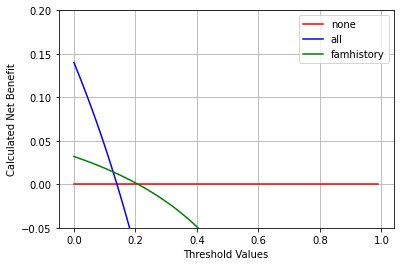

In [44]:
dca_famhistory_df = \
    dca(
        data=df_cancer_dx,
        outcome='cancer',
        modelnames=['famhistory']
    )

plot_graphs(
    plot_df=dca_famhistory_df,
    graph_type='net_benefit',
    y_limits=[-0.05, 0.2],
    color_names=['red', 'blue', 'green']
)

Run DCA With Cancer Outcome and Famhistory Predictor/Model with Abridged Thresholds

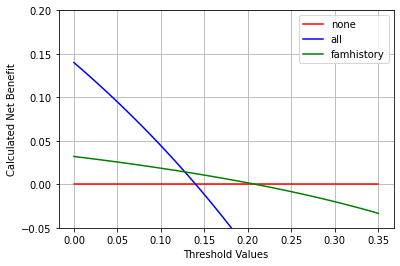

In [45]:
dca_famhistory2_df = \
    dca(
        data=df_cancer_dx,
        outcome='cancer',
        modelnames=['famhistory'],
        thresholds=np.arange(0, 0.36, 0.01),
    )

plot_graphs(
    plot_df=dca_famhistory2_df,
    graph_type='net_benefit',
    y_limits=[-0.05, 0.2],
    color_names=['red', 'blue', 'green']
)

Run Multivariate Model and Print Model Summary

In [46]:
mod2 = sm.GLM.from_formula('cancer ~ marker + age + famhistory', data=df_cancer_dx, family=sm.families.Binomial())
mod2_results = mod2.fit()

mod2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 cancer   No. Observations:                  750
Model:                            GLM   Df Residuals:                      746
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -213.89
Date:                Sun, 22 Jan 2023   Deviance:                       427.79
Time:                        22:55:23   Pearson chi2:                     743.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -22.0703      2.211     -9.984      0.000     -26.403     -17.738
marker         0.9783      0.118      8.276      0.000       0.747       1.210
age            0.2820      0.031      9.040      0.000       0.221       0.343
famhistory     0.8652      0.308      2.807      0.005       0.261       1.469
==============================================================================
"""

Following 3 Steps Coming Soon! 
- build multivariable logistic regression model
- summarize model
- add predicted values from model to data set

Run DCA on Multivariable Model

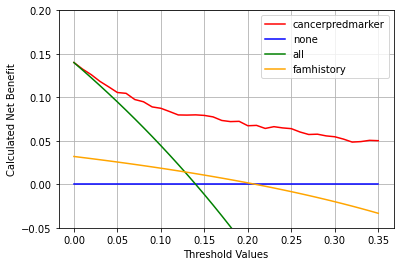

In [47]:
dca_multi_df = \
    dca(
        data=df_cancer_dx,
        outcome='cancer',
        modelnames=['famhistory', 'cancerpredmarker'],
        thresholds=np.arange(0,0.36,0.01)
    )

plot_graphs(
    plot_df=dca_multi_df,
    y_limits=[-0.05, 0.2],
    graph_type='net_benefit',
    color_names=['red', 'blue', 'green', 'orange']
)

Smooth #1

In [48]:
# Coming Soon

Smooth #2

In [49]:
# Coming Soon

Pub Model

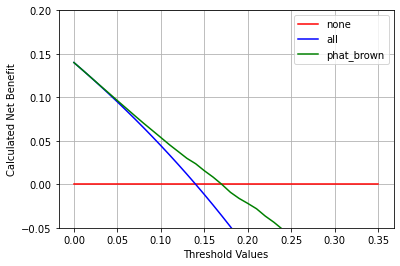

In [50]:
df_cancer_dx['logodds_brown'] = 0.75 * df_cancer_dx['famhistory'] + 0.26*df_cancer_dx['age'] - 17.5
df_cancer_dx['phat_brown'] = np.exp(df_cancer_dx['logodds_brown']) / (1 + np.exp(df_cancer_dx['logodds_brown']))

dca_pub_model_df = \
  dca(
      data=df_cancer_dx,
      outcome='cancer',
      modelnames=['phat_brown'],
      thresholds=np.arange(0,0.36,0.01),
  )

plot_graphs(
    plot_df=dca_pub_model_df,
    y_limits=[-0.05, 0.2],
    graph_type='net_benefit',
    color_names=['red', 'blue', 'green']
)

Joint Calculations

In [72]:
df_cancer_dx['high_risk'] = np.where(df_cancer_dx['risk_group'] == "high", 1, 0)

df_cancer_dx['joint'] = np.where((df_cancer_dx['risk_group'] == 'high') |
                                 (df_cancer_dx['cancerpredmarker'] > 0.15), 1, 0)

df_cancer_dx['conditional'] = np.where((df_cancer_dx['risk_group'] == "high") |
                                       ((df_cancer_dx['risk_group'] == "intermediate") &
                                        (df_cancer_dx['cancerpredmarker'] > 0.15)), 1, 0)


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [74]:
np.where(df_cancer_dx['risk_group'] == "high", 1, 0)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [73]:
df_cancer_dx

,patientid,cancer,risk_group,age,famhistory,marker,cancerpredmarker,all,none,logodds_brown,phat_brown,high_risk,joint,conditional
0,1,0,0.098314,64.03445,-2.220446e-16,0.106329,0.037201,1.0,-2.220446e-16,-0.851043,0.299214,0,0,0
1,2,0,0.748789,78.46741,-2.220446e-16,0.077157,0.578907,1.0,-2.220446e-16,2.901527,0.947922,0,1,0
2,3,0,0.098314,64.14617,-2.220446e-16,0.072484,0.021551,1.0,-2.220446e-16,-0.821996,0.305340,0,0,0
3,4,0,0.098314,58.53482,-2.220446e-16,0.065986,0.003910,1.0,-2.220446e-16,-2.280947,0.092713,0,0,0
4,5,0,0.098314,63.99250,-2.220446e-16,0.068018,0.018790,1.0,-2.220446e-16,-0.861950,0.296932,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,0,0.150865,66.09628,-2.220446e-16,0.098589,0.057813,1.0,-2.220446e-16,-0.314967,0.421903,0,0,0
746,747,1,0.150865,65.75370,1.000000e+00,0.124243,0.160424,1.0,-2.220446e-16,0.345962,0.585638,0,1,0
747,748,0,0.150865,70.28287,-2.220446e-16,0.071650,0.108838,1.0,-2.220446e-16,0.773546,0.684288,0,0,0
748,749,0,0.098314,61.32673,-2.220446e-16,0.096746,0.015285,1.0,-2.220446e-16,-1.555050,0.174358,0,0,0


Perform DCA On Joint Data

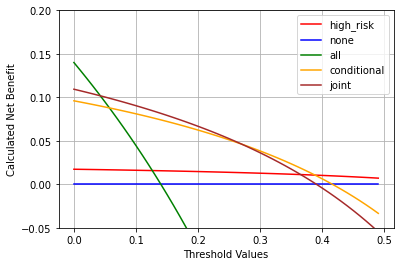

In [52]:
  dca_joint_df = \
      dca(
          data=df_cancer_dx,
          outcome='cancer',
          modelnames=['high_risk', 'joint', 'conditional'],
          thresholds=np.arange(0, 0.5, 0.01)
      )
  
  plot_graphs(
      plot_df=dca_joint_df,
      graph_type='net_benefit',
      y_limits=[-0.05, 0.2],
      color_names=['red', 'blue', 'green', 'orange', 'brown']
  )

Run DCA On a Simple Harms Per Model Case

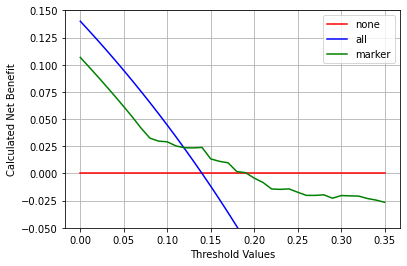

In [53]:
dca_harm_simple_df = \
  dca(
      data=df_cancer_dx,
      outcome='cancer',
      modelnames=['marker'],
      thresholds=np.arange(0, 0.36, 0.01),
      harm={'marker': 0.0333},
      models_to_prob=['marker']
  )

plot_graphs(
    plot_df=dca_harm_simple_df,
    graph_type='net_benefit',
    color_names=['red', 'blue', 'green'],
    y_limits=[-0.05, 0.15]
)

Run DCA On a Harms Per Model Case

In [71]:
harm_marker = 0.0333
df_cancer_dx
# harm_conditional = (df_cancer_dx['risk_group'] == "intermediate").mean() * harm_marker
# df_cancer_dx['risk_group']

# dca_harm_df = \
#   dca(
#       data=df_cancer_dx,
#       outcome='cancer',
#       modelnames=['risk_group'],
#       models_to_prob=['risk_group'],
#       thresholds=np.arange(0, 0.36, 0.01),
#       harm={'risk_group': harm_conditional}
#   )

# plot_graphs(
#     plot_df=dca_harm_df,
#     graph_type='net_benefit',
#     y_limits=[-0.05, 0.2],
#     color_names=['red', 'blue', 'green']
# )

,patientid,cancer,risk_group,age,famhistory,marker,cancerpredmarker,all,none,logodds_brown,phat_brown,high_risk,joint,conditional
0,1,0,0.098314,64.03445,-2.220446e-16,0.106329,0.037201,1.0,-2.220446e-16,-0.851043,0.299214,-2.220446e-16,-2.220446e-16,-2.220446e-16
1,2,0,0.748789,78.46741,-2.220446e-16,0.077157,0.578907,1.0,-2.220446e-16,2.901527,0.947922,1.000000e+00,1.000000e+00,1.000000e+00
2,3,0,0.098314,64.14617,-2.220446e-16,0.072484,0.021551,1.0,-2.220446e-16,-0.821996,0.305340,-2.220446e-16,-2.220446e-16,-2.220446e-16
3,4,0,0.098314,58.53482,-2.220446e-16,0.065986,0.003910,1.0,-2.220446e-16,-2.280947,0.092713,-2.220446e-16,-2.220446e-16,-2.220446e-16
4,5,0,0.098314,63.99250,-2.220446e-16,0.068018,0.018790,1.0,-2.220446e-16,-0.861950,0.296932,-2.220446e-16,-2.220446e-16,-2.220446e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,0,0.150865,66.09628,-2.220446e-16,0.098589,0.057813,1.0,-2.220446e-16,-0.314967,0.421903,-2.220446e-16,-2.220446e-16,-2.220446e-16
746,747,1,0.150865,65.75370,1.000000e+00,0.124243,0.160424,1.0,-2.220446e-16,0.345962,0.585638,-2.220446e-16,1.000000e+00,1.000000e+00
747,748,0,0.150865,70.28287,-2.220446e-16,0.071650,0.108838,1.0,-2.220446e-16,0.773546,0.684288,-2.220446e-16,-2.220446e-16,-2.220446e-16
748,749,0,0.098314,61.32673,-2.220446e-16,0.096746,0.015285,1.0,-2.220446e-16,-1.555050,0.174358,-2.220446e-16,-2.220446e-16,-2.220446e-16


In [60]:
harm_conditional

0.0